# El problema
23_24

Vamos a utilizar para ello el IRIS DataSet pero considerando únicamente dos características (nos facilitará la visualización de los resultados)

## Iris DataSet

(IRIS Data Set - Repositorio UCI)[http://archive.ics.uci.edu/ml/datasets/Iris/]

Esta es quizás la base de datos más conocida en el mundo del análisis de datos.  El conjunto de datos contiene 3 clases de 50 casos cada una, donde cada clase se refiere a un tipo de planta de iris. Una de las clases es linealmente separable de las otras 2; estas últimas NO son linealmente separables entre sí.

Objetivo: clase de planta de iris.


# 0. Carga de Datos

En este caso los datos nos la facilita la propia API de scikit-learn



In [1]:
# import some data to play with
from sklearn import datasets
iris = datasets.load_iris()

# we only take the first two features.
# We could avoid this ugly # slicing by using a two-dim dataset
X = iris.data
y = iris.target


In [2]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Posteriomente lo cargamos en un DataFrame de Pandas con el nombre de *df_iris*

In [3]:
# 0. load data in DataFrame
import numpy as np
import pandas as pd
df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

df_iris.target = df_iris.target.astype(int)


df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df_iris['target'].unique()

array([0, 1, 2])

Posteriormente seleccionamos las variables con las que trabajar.

Es muy importante seleccionar las características cuando se va a resolver un problema mediante kNN ya que muchas variables pueden distorsionar el resultado del algoritmo que está basado en la distancia.

Para realizar esta selección vamos a utilizar la correlación entre cada una de las características y la variable a predecir.



In [5]:
#df_iris[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
features_iris = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
df_iris[features_iris]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


<Axes: >

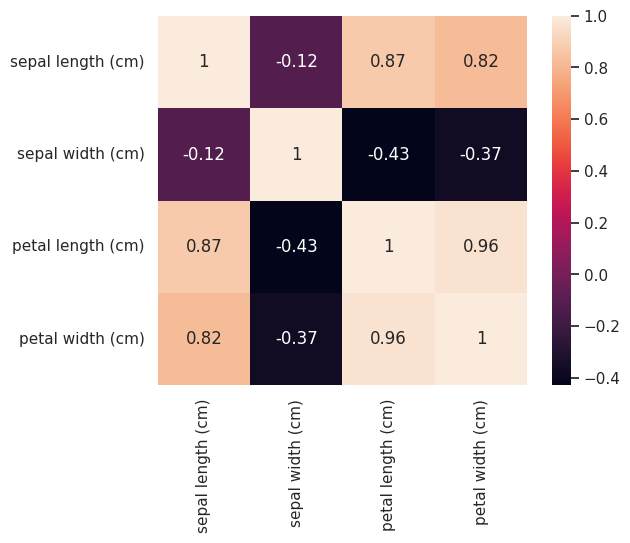

In [6]:
import seaborn as sns

sns.set()
#sns.heatmap(df_iris.corr(), square=True, annot=True)
sns.heatmap(df_iris[features_iris].corr(), square=True, annot=True)

Existen variables muy correlacionadas entre si que nos pueden dificultar el trabajo por lo que podríamos eliminar alguna de ellas.



Además vamos a dividir el conjunto de datos en train y test en un porcentaje de 2/3(train) vs 1/3(test)

In [7]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_iris[['petal length (cm)','petal width (cm)', 'target']], test_size=0.33)

In [8]:
# el objetivo de esta celda es ver el valor de los índices (primera columna), tras hacer el train_test_split
train

,petal length (cm),petal width (cm),target
126,4.8,1.8,2
82,3.9,1.2,1
46,1.6,0.2,0
4,1.4,0.2,0
50,4.7,1.4,1
...,...,...,...
66,4.5,1.5,1
99,4.1,1.3,1
115,5.3,2.3,2
88,4.1,1.3,1


In [9]:
# Restablecer los índices no es un requisito técnico para aplicar kNN, puede ser una buena práctica de manejo de datos que ayuda a evitar problemas y errores,
# especialmente en flujos de trabajo de análisis de datos más complejos.
# En este caso lo aplicamos para conocer la existencia de esta técnica.
# Podemos comparar los resultados finales del predict aplicando o no esta técnica.
train.reset_index(inplace = True) # Restablece el índice del DataFrame dado. Reemplaza el índice antiguo con el índice predeterminado. Si el DataFrame dado tiene un MultiIndex, este método elimina todos los niveles.
                                  # https://www.delftstack.com/es/api/python-pandas/pandas-dataframe-dataframe.reset_index-function/#:~:text=reset_index()%20restablece%20el%20%C3%ADndice,m%C3%A9todo%20elimina%20todos%20los%20niveles.

                                  # inplace: indica si el método aplica las modificaciones al propio objeto o devuelve una copia modificada del mismo, por defecto el valor es falso, por lo que se obtiene una copia modificada
                                  # https://www.analyticslane.com/2021/07/29/pandas-convertir-una-columna-en-el-indice/#:~:text=Los%20DataFrame%20de%20Pandas%20contienen,posible%20modificar%20todos%20los%20%C3%ADndices.
test.reset_index(inplace = True)

In [10]:
# Vemos que al reiniciar los índices, ahora se ha renumerado el índice si los comparamos con el valor que había en la delda anterior.
train

,index,petal length (cm),petal width (cm),target
0,126,4.8,1.8,2
1,82,3.9,1.2,1
2,46,1.6,0.2,0
3,4,1.4,0.2,0
4,50,4.7,1.4,1
...,...,...,...,...
95,66,4.5,1.5,1
96,99,4.1,1.3,1
97,115,5.3,2.3,2
98,88,4.1,1.3,1


#1. Parametrización

Existen diferentes parámetros para método basado en los vecinos más cercanos utilizando scikit-learn



*   **KNeighbors/Radius**: KNeihgbors está basado en el estudio de los k vecinos más cercanos para cada punto, mientras que RadiusNeighboors están basados en un conjunto de vecinos que están dentro de un radio. **Nuestra elección es la primera**, la segunda sería útil cuando los datos no estuvieran muestreados de forma uniforme.
* **K/Radio**
    * k: Un número k mayor suprime el efecto del ruido pero hace a los límites de clasificación más distintos.
    * Radios, un radio fijo es muy adecuado cuando los datos están muy dispersos (sprarse neighboors)
*   **Pesos** : dos posibles valores, "uniform" cada vecino tiene el mismo peso, weights se asigna un peso a cada vecino proporcional a la distancia que esté del elemento referencia. También se puede definir una función por parte del usuario

Nuestra elección KNeighbors y k y pesos se van a parametrizar para ello se ejecutará [validación cruzada]([https://es.wikipedia.org/wiki/Validaci%C3%B3n_cruzada) y como medida de éxito vamos a utilizar el Accuracy


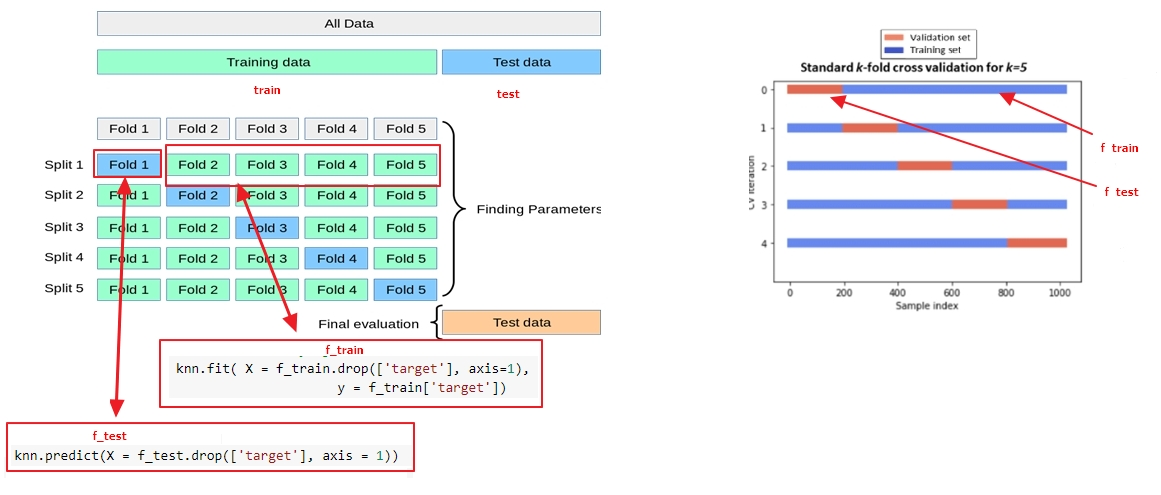

Max Value uniform : 0.99 (4)
Max Value distance : 1.0 (4)


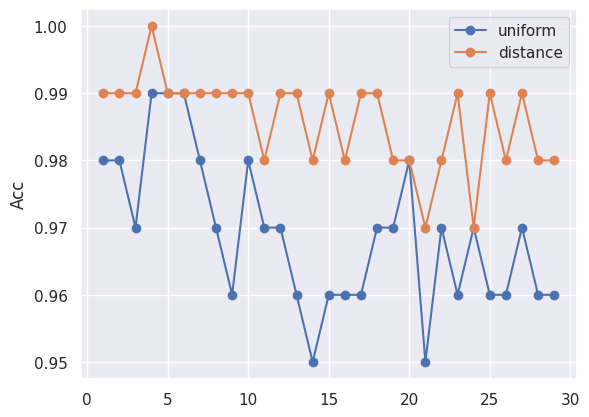

In [11]:
from sklearn import neighbors
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np

# Para el entrenamiento se aplica Cross Validation (Validación cruzada)
cv = KFold(n_splits = 5, shuffle = True) # shuffle = False si hay dimensión temporal


for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,30):
       fold_accuracy = []
       knn = neighbors.KNeighborsClassifier(n_neighbors, weights=weights) # La métrica por defecto es minkowski
       #knn = neighbors.KNeighborsClassifier(n_neighbors, weights=weights, metric="euclidean")
       for train_fold, test_fold in cv.split(train):
          # División train test aleatoria
          f_train = train.loc[train_fold]
          f_test = train.loc[test_fold]
          # entrenamiento y ejecución del modelo
          knn.fit( X = f_train.drop(['target'], axis=1),
                               y = f_train['target'])
          y_pred = knn.predict(X = f_test.drop(['target'], axis = 1))
          # evaluación del modelo
          acc = accuracy_score(f_test['target'], y_pred)
          fold_accuracy.append(acc)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))

   plt.plot(range(1,len(total_scores)+1), total_scores,
             marker='o', label=weights)
   print ('Max Value ' +  weights + " : " +  str(max(total_scores)) +" (" + str(np.argmax(total_scores) + 1) + ")")
   plt.ylabel('Acc')


plt.legend()
plt.show()



In [12]:
total_scores

[0.99,
 0.99,
 0.99,
 1.0,
 0.99,
 0.99,
 0.99,
 0.99,
 0.99,
 0.99,
 0.9800000000000001,
 0.99,
 0.99,
 0.9800000000000001,
 0.99,
 0.9800000000000001,
 0.99,
 0.99,
 0.9800000000000001,
 0.9800000000000001,
 0.97,
 0.9800000000000001,
 0.99,
 0.97,
 0.99,
 0.9800000000000001,
 0.99,
 0.9800000000000001,
 0.9800000000000001]

# 2. Construcción y ejecución del modelo



Una vez que hemos identificado la mejor parametrización vamos a pasar a hacer una ejecución del modelo y vamos graficar sus resultados.

Recordamos que al final del paso 1 hemos dividido en entrenamiento/tuneado y test

Posteriormente, vamos a ejecutar el modelo con la mejor parametrización que hayamos obtenido anteriormente

In [13]:
# constructor
n_neighbors = 11 # ¿De dónde sale este valor? Del resultado de la gráfica en la celda anterior. En la
                 # última iteración (29) del bucle el número de vecinos que obtenía mejor resultado
                 # aplicando KNN es 11, aunque se podría probar con 23
weights = 'distance'
knn = neighbors.KNeighborsClassifier(n_neighbors= n_neighbors, weights=weights) # Se utiliza este método porque es un problema de clasificación
# fit and predict
knn.fit(X = train[['petal length (cm)','petal width (cm)']], y = train['target']) # En este caso no entrena sino memoriza los valores
y_pred = knn.predict(X = test[['petal length (cm)','petal width (cm)']])
acc = accuracy_score(test['target'], y_pred)
print ('Acc', acc)

# Práctica: probar a cambiar las variables/propiedades con  las que se entrena y predice a ver si se mejoran los resultados.


Acc 0.96


In [14]:
from sklearn.metrics import classification_report
print(classification_report(test['target'], y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      0.88      0.94        17
           2       0.85      1.00      0.92        11

    accuracy                           0.96        50
   macro avg       0.95      0.96      0.95        50
weighted avg       0.97      0.96      0.96        50



Graficamos la solución mediante los diagramas de Voronoi : **Atención** lo que se muestra no es un diagrama de Varanoi es un diagrama de dispersión (scatter)

**Título**: El diagrama de Voronoi, la forma matemática de dividir el mundo

**Url**: [Pincha aquí](https://www.abc.es/ciencia/abci-diagrama-voronoi-forma-matematica-dividir-mundo-201704241101_noticia.html)

In [15]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
h = .05  # step size in the mesh (maya)


#X = train[['petal length (cm)','petal width (cm)']].to_numpy()
#y = train['target'].to_numpy()

X = test[['petal length (cm)','petal width (cm)']].to_numpy()
y = test['target'].to_numpy()



In [16]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


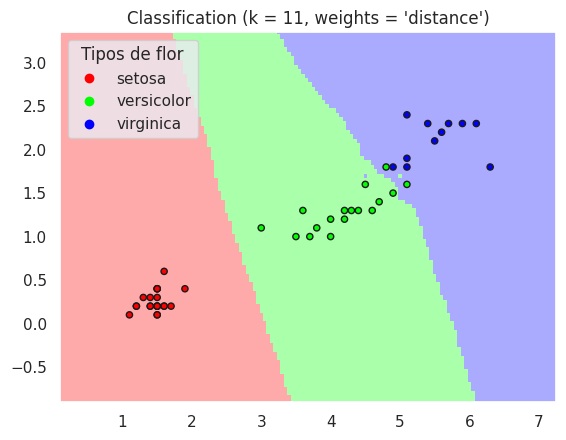

In [17]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # Para determinar el valor mínimo y máximo del eje horizontal  (x)
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 # Para determinar el valor mínimo y máximo del eje vertical  (y)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h)) # arange : devuelve un array con los valores espaciados a una distancia h de manera uniforme
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]) # Realiza la predicción, de toda la posible superficie donde colocar lox valores

# Put the result into a color plot
# Pintar la superficie del gráfico con los tres colores defindos
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# En el conjunto de instrucciones anteriores lo que ha hecho es representar la superficie donde se colocarán los valores resultantes.

# Plot also the training points, o los de test. Según se han configurado en la celda anterior.

sc = plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=cmap_bold,
             edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.legend(handles=sc.legend_elements()[0], loc='upper left', title='Tipos de flor', labels=iris.target_names.tolist())

plt.show()



Y finalmente visualizamos la Matriz de Confusión

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [ ]:
#test['target']
y_pred

array([1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 2,
       2, 2, 0, 2, 0, 0, 1, 2, 0, 2, 2, 2, 1, 1, 0, 0, 0, 0, 1, 0, 2, 2,
       1, 2, 0, 2, 1, 0])

Confusion matrix, without normalization
[[18  0  0]
 [ 0 13  2]
 [ 0  1 16]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

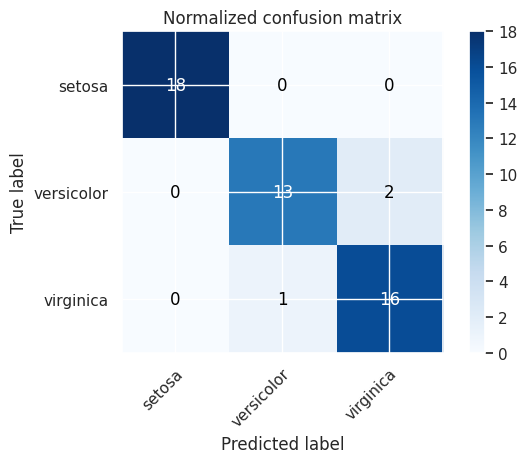

In [ ]:
plot_confusion_matrix(test['target'], y_pred, classes=iris.target_names, normalize=False,
                      title='Normalized confusion matrix')


# Ejercicio voluntario

Realizar dos variaciones de esta solución, cambiando las variables con las que realizar la predicción, el valor del parámetro de la distancia o la métrica (La métrica por defecto es minkowski). Obtieniendo un documento final en pdf con los diferentes resultados/gráficos y precisión obtenidos. De forma que te permita determinar cuál sería la parametrizaciónn más acertada según las pruebas que has realizado.

